In [181]:
from itertools import cycle, islice

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import signal
from sklearn.model_selection import train_test_split
from tpot import TPOTClassifier
from sklearn.externals import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import pandas
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
import numpy as np
from sklearn.utils.multiclass import unique_labels

In [182]:
from pandas import read_csv
import numpy as np
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
filename = "Downloads/Syem_Data_Large.csv"
names = ['Mean HR','SDNN','RMSSD','NN50','PNN50','SD1','SD2','ApEn',
         'VLF(ms^2)','LF(ms^2)','HF(ms^2)','LF/HF ratio','TP',
         'VLF(ms^2)','LF_lomb(ms^2)','HF_lomb(ms^2)','LF/HF_lomb ratio','TP_lomb','Stress']
dataframe = read_csv(filename, names =names)
df = dataframe
df.head(5)
array = dataframe.values
X = np.array(dataframe.iloc[:,0:18])
y = np.array(dataframe.iloc[:,18])
y=y.reshape(-1,1)
scaler = MinMaxScaler(feature_range = (0,1)) # scale the values to min 0, max 1
rescaledX = scaler.fit_transform(X) # fit the trainning feature X into scaler
# #summarize the transformed data

scaler = MinMaxScaler(feature_range = (0,1)) # scale the values to min 0, max 1
rescaled_y = scaler.fit_transform(y)
set_printoptions(precision=3) # how many decimal places.
print(rescaledX[0:5,:])


X_train, X_test, y_train, y_test = train_test_split(rescaledX, rescaled_y, test_size = 0.20, random_state = 7)
models = DecisionTreeClassifier()
models.fit(X_train,y_train)
models.score(X_test,y_test)

/Users/syem/anaconda3/lib/python3.7/site-packages/pandas/io/parsers.py:702: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


[[1.196e-01 1.906e-02 8.005e-03 3.125e-02 2.706e-01 8.005e-03 2.523e-02
  2.214e-03 1.925e-05 5.443e-06 3.416e-05 6.674e-02 1.642e-05 1.961e-03
  3.140e-03 3.528e-03 3.235e-01 3.756e-03]
 [7.900e-02 3.263e-02 3.440e-02 2.788e-01 8.984e-02 3.439e-02 3.352e-02
  5.225e-01 2.691e-04 1.105e-04 1.348e-04 5.928e-01 1.771e-04 1.167e-02
  1.245e-02 2.703e-02 1.629e-01 1.730e-02]
 [8.845e-02 9.475e-02 9.962e-02 3.365e-01 4.281e-01 9.967e-02 9.346e-02
  7.569e-01 2.712e-04 2.017e-04 6.511e-04 1.836e-01 3.050e-04 1.641e-02
  1.098e-02 1.472e-02 2.929e-01 1.667e-02]
 [8.191e-02 4.100e-02 4.396e-02 1.899e-01 4.004e-01 4.398e-02 4.114e-02
  6.010e-01 2.226e-04 1.048e-04 1.826e-04 3.961e-01 1.752e-04 1.192e-02
  9.496e-03 2.698e-02 1.120e-01 1.614e-02]
 [2.594e-01 4.369e-02 4.836e-02 1.250e-01 1.655e-01 4.836e-02 4.259e-02
  6.623e-01 4.302e-04 1.157e-04 4.604e-04 1.369e-01 3.159e-04 4.917e-03
  1.119e-02 4.622e-02 5.889e-02 2.541e-02]]


1.0

In [183]:
y_pred = models.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0

/Users/syem/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/syem/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/syem/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/syem/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/syem/anaconda3/lib/pyth

Accuracy: 85.714% (0.508%)


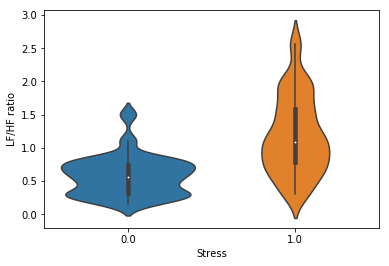

In [184]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# evaluate acc using cross validation
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state = seed)
models = LogisticRegression()
results = cross_val_score(models, rescaledX, rescaled_y, cv = kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))
# sns.boxplot(x='Stress', y='Mean HR', data = df)
# df.hist()
# pyplot.show()

# df['LF/HF_lomb ratio'].plot.hist()

#df['ApEn'].plot.hist()

# df['LF/HF ratio'].plot.hist()


# df['Stress'].plot.hist()

# sns.FacetGrid(df,hue='Stress',size = 5).map(sns.distplot,'LF/HF ratio').add_legend()

sns.violinplot(x='Stress',y='LF/HF ratio',data=df,size=6)


# %matplotlib inline 
# import matplotlib.pyplot as plt
# import seaborn as sns

# sns.boxplot(x='stress',y='HR',data=dataframe_hrv) # x = label, y = feature
# sns.boxplot(x='stress',y='HF',data=dataframe_hrv)


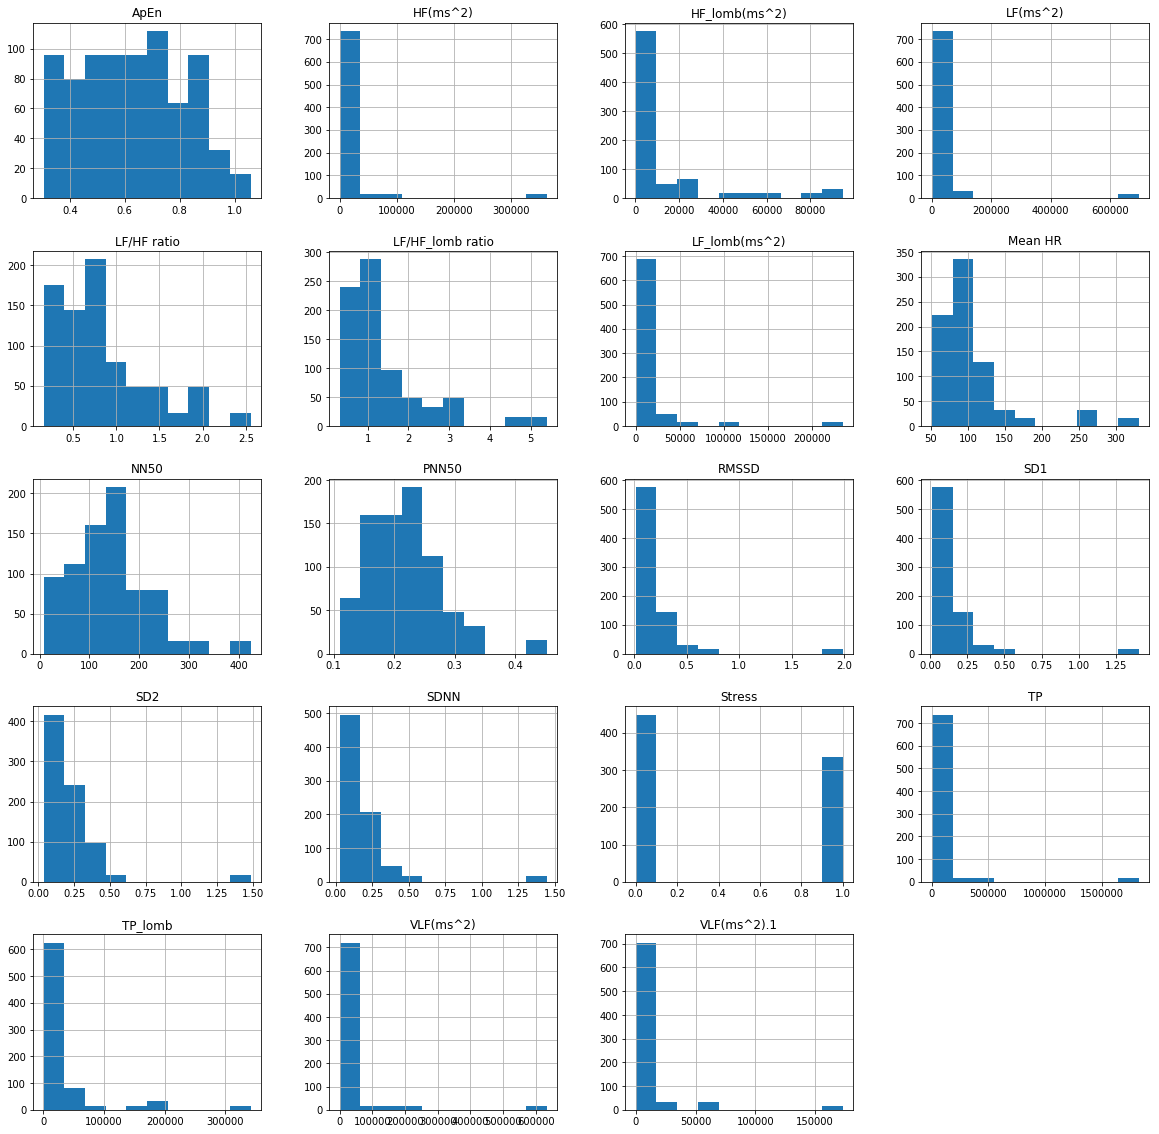

In [185]:
df.hist(figsize = (20,20))
pyplot.show()


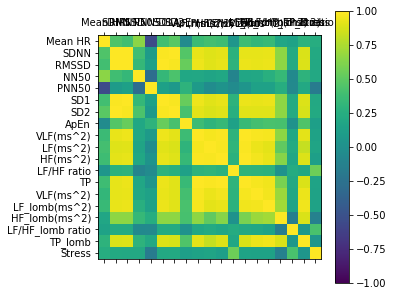

In [186]:
cor_matrix = df.corr()
#plot
fig = pyplot.figure(figsize = (5,5))
ax = fig.add_subplot(111)
cax = ax.matshow(cor_matrix, vmin = -1, vmax = 1)
fig.colorbar(cax)
ticks = np.arange(0,19,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()



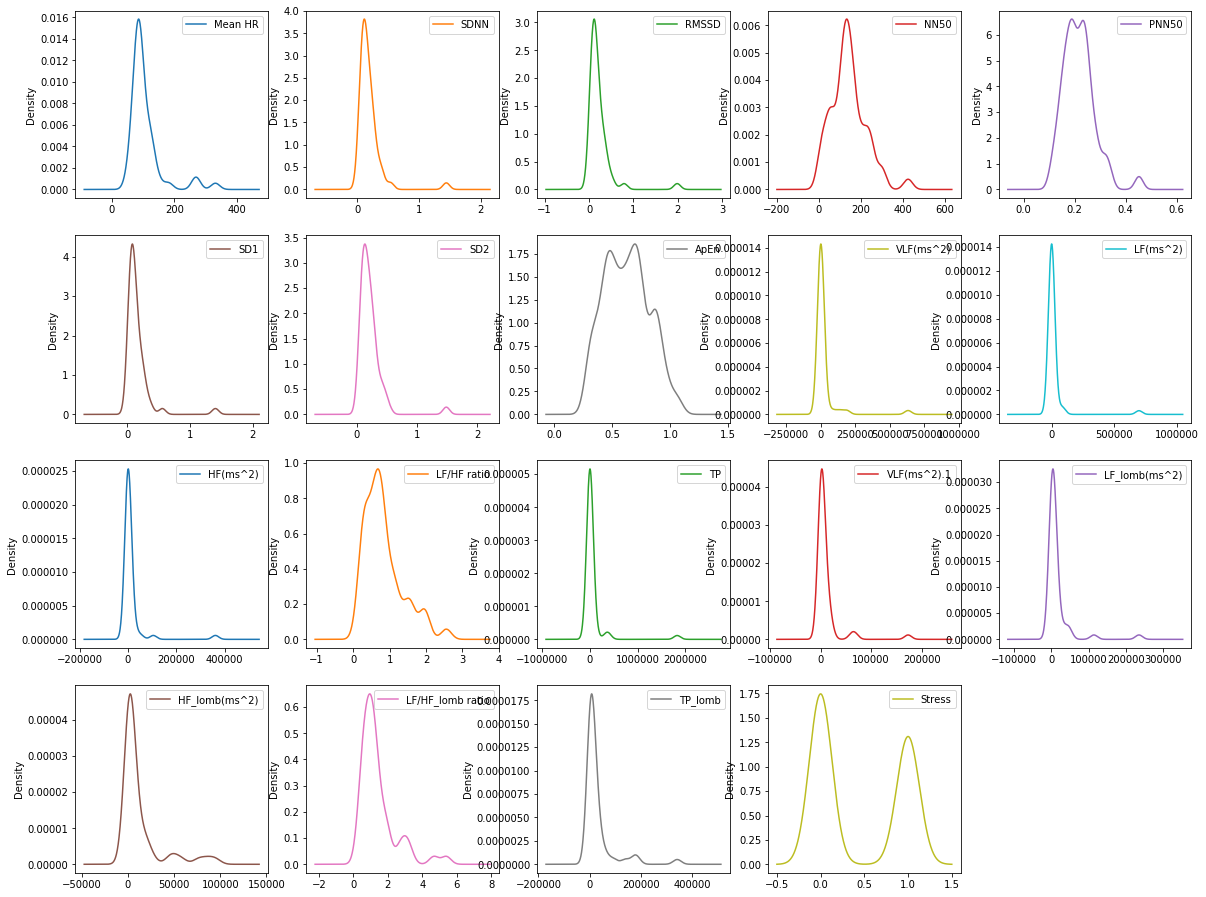

In [187]:
df.plot(kind='density', subplots = True, layout=(5,5),figsize = (20,20), sharex = False)
pyplot.show()

# data.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
# pyplot.show()


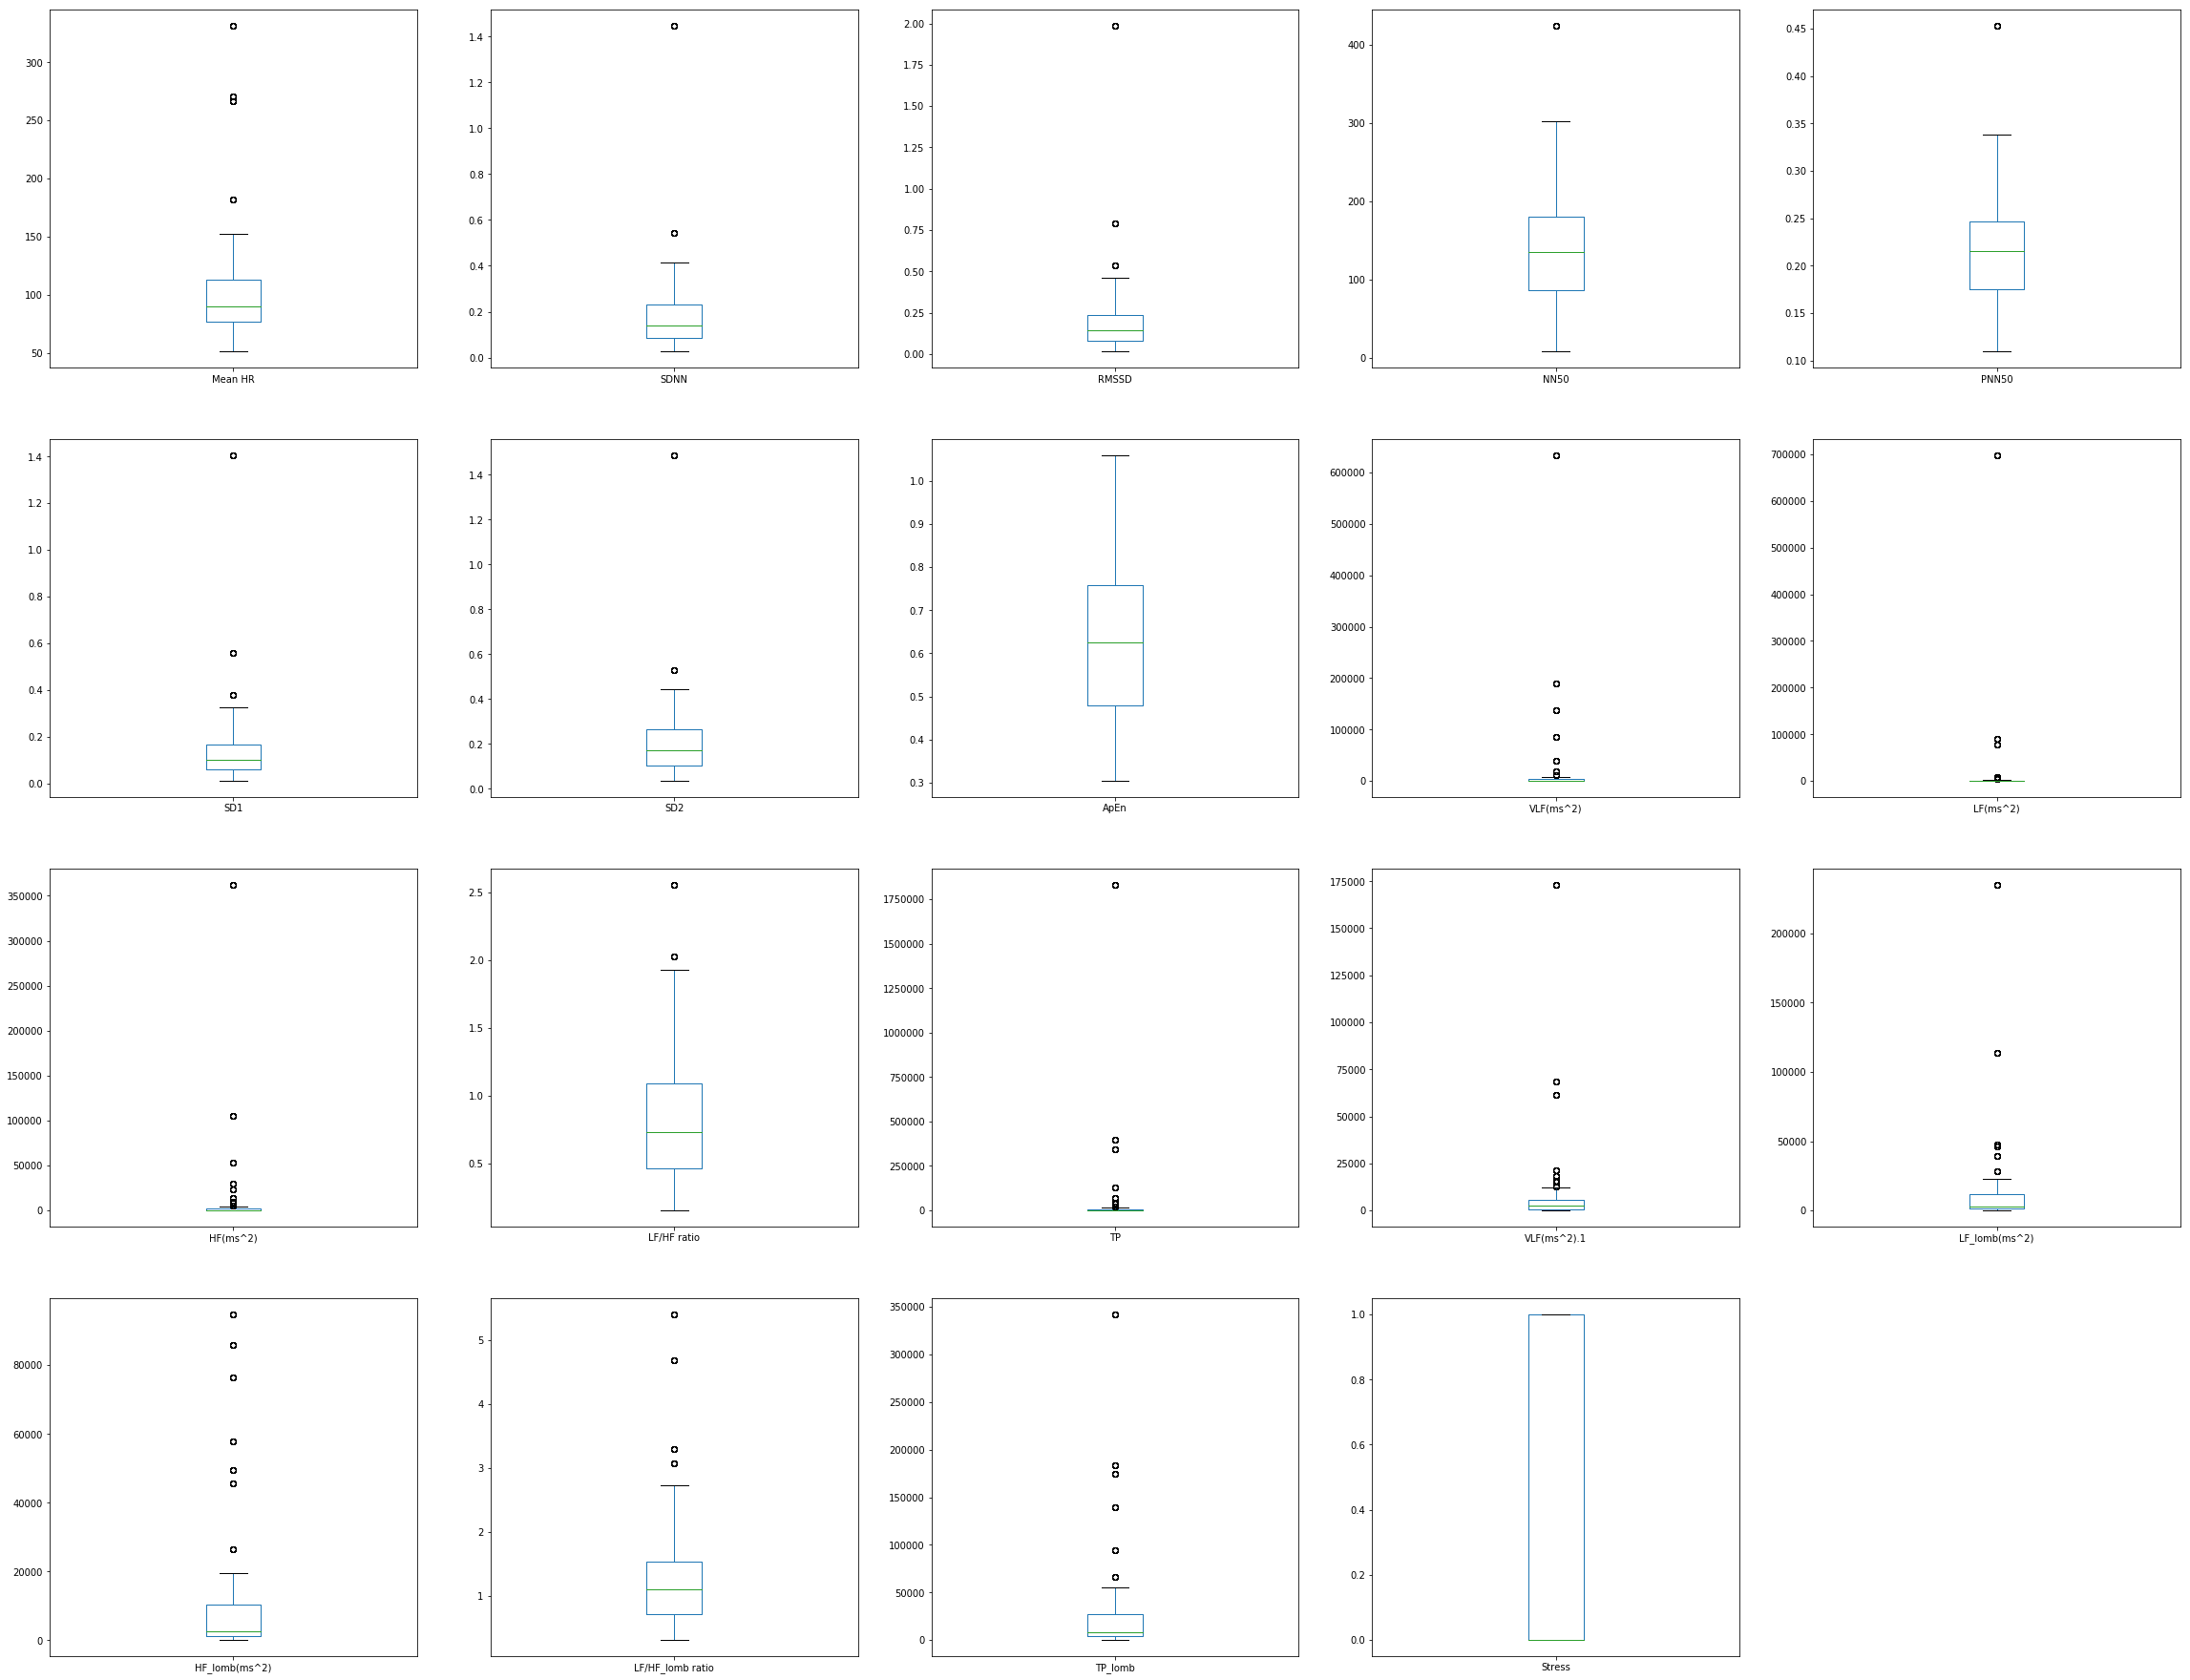

In [188]:
df.plot(kind = 'box', subplots = True, layout= (5,5), sharex=False, sharey=False, figsize=(40,40))
pyplot.show()


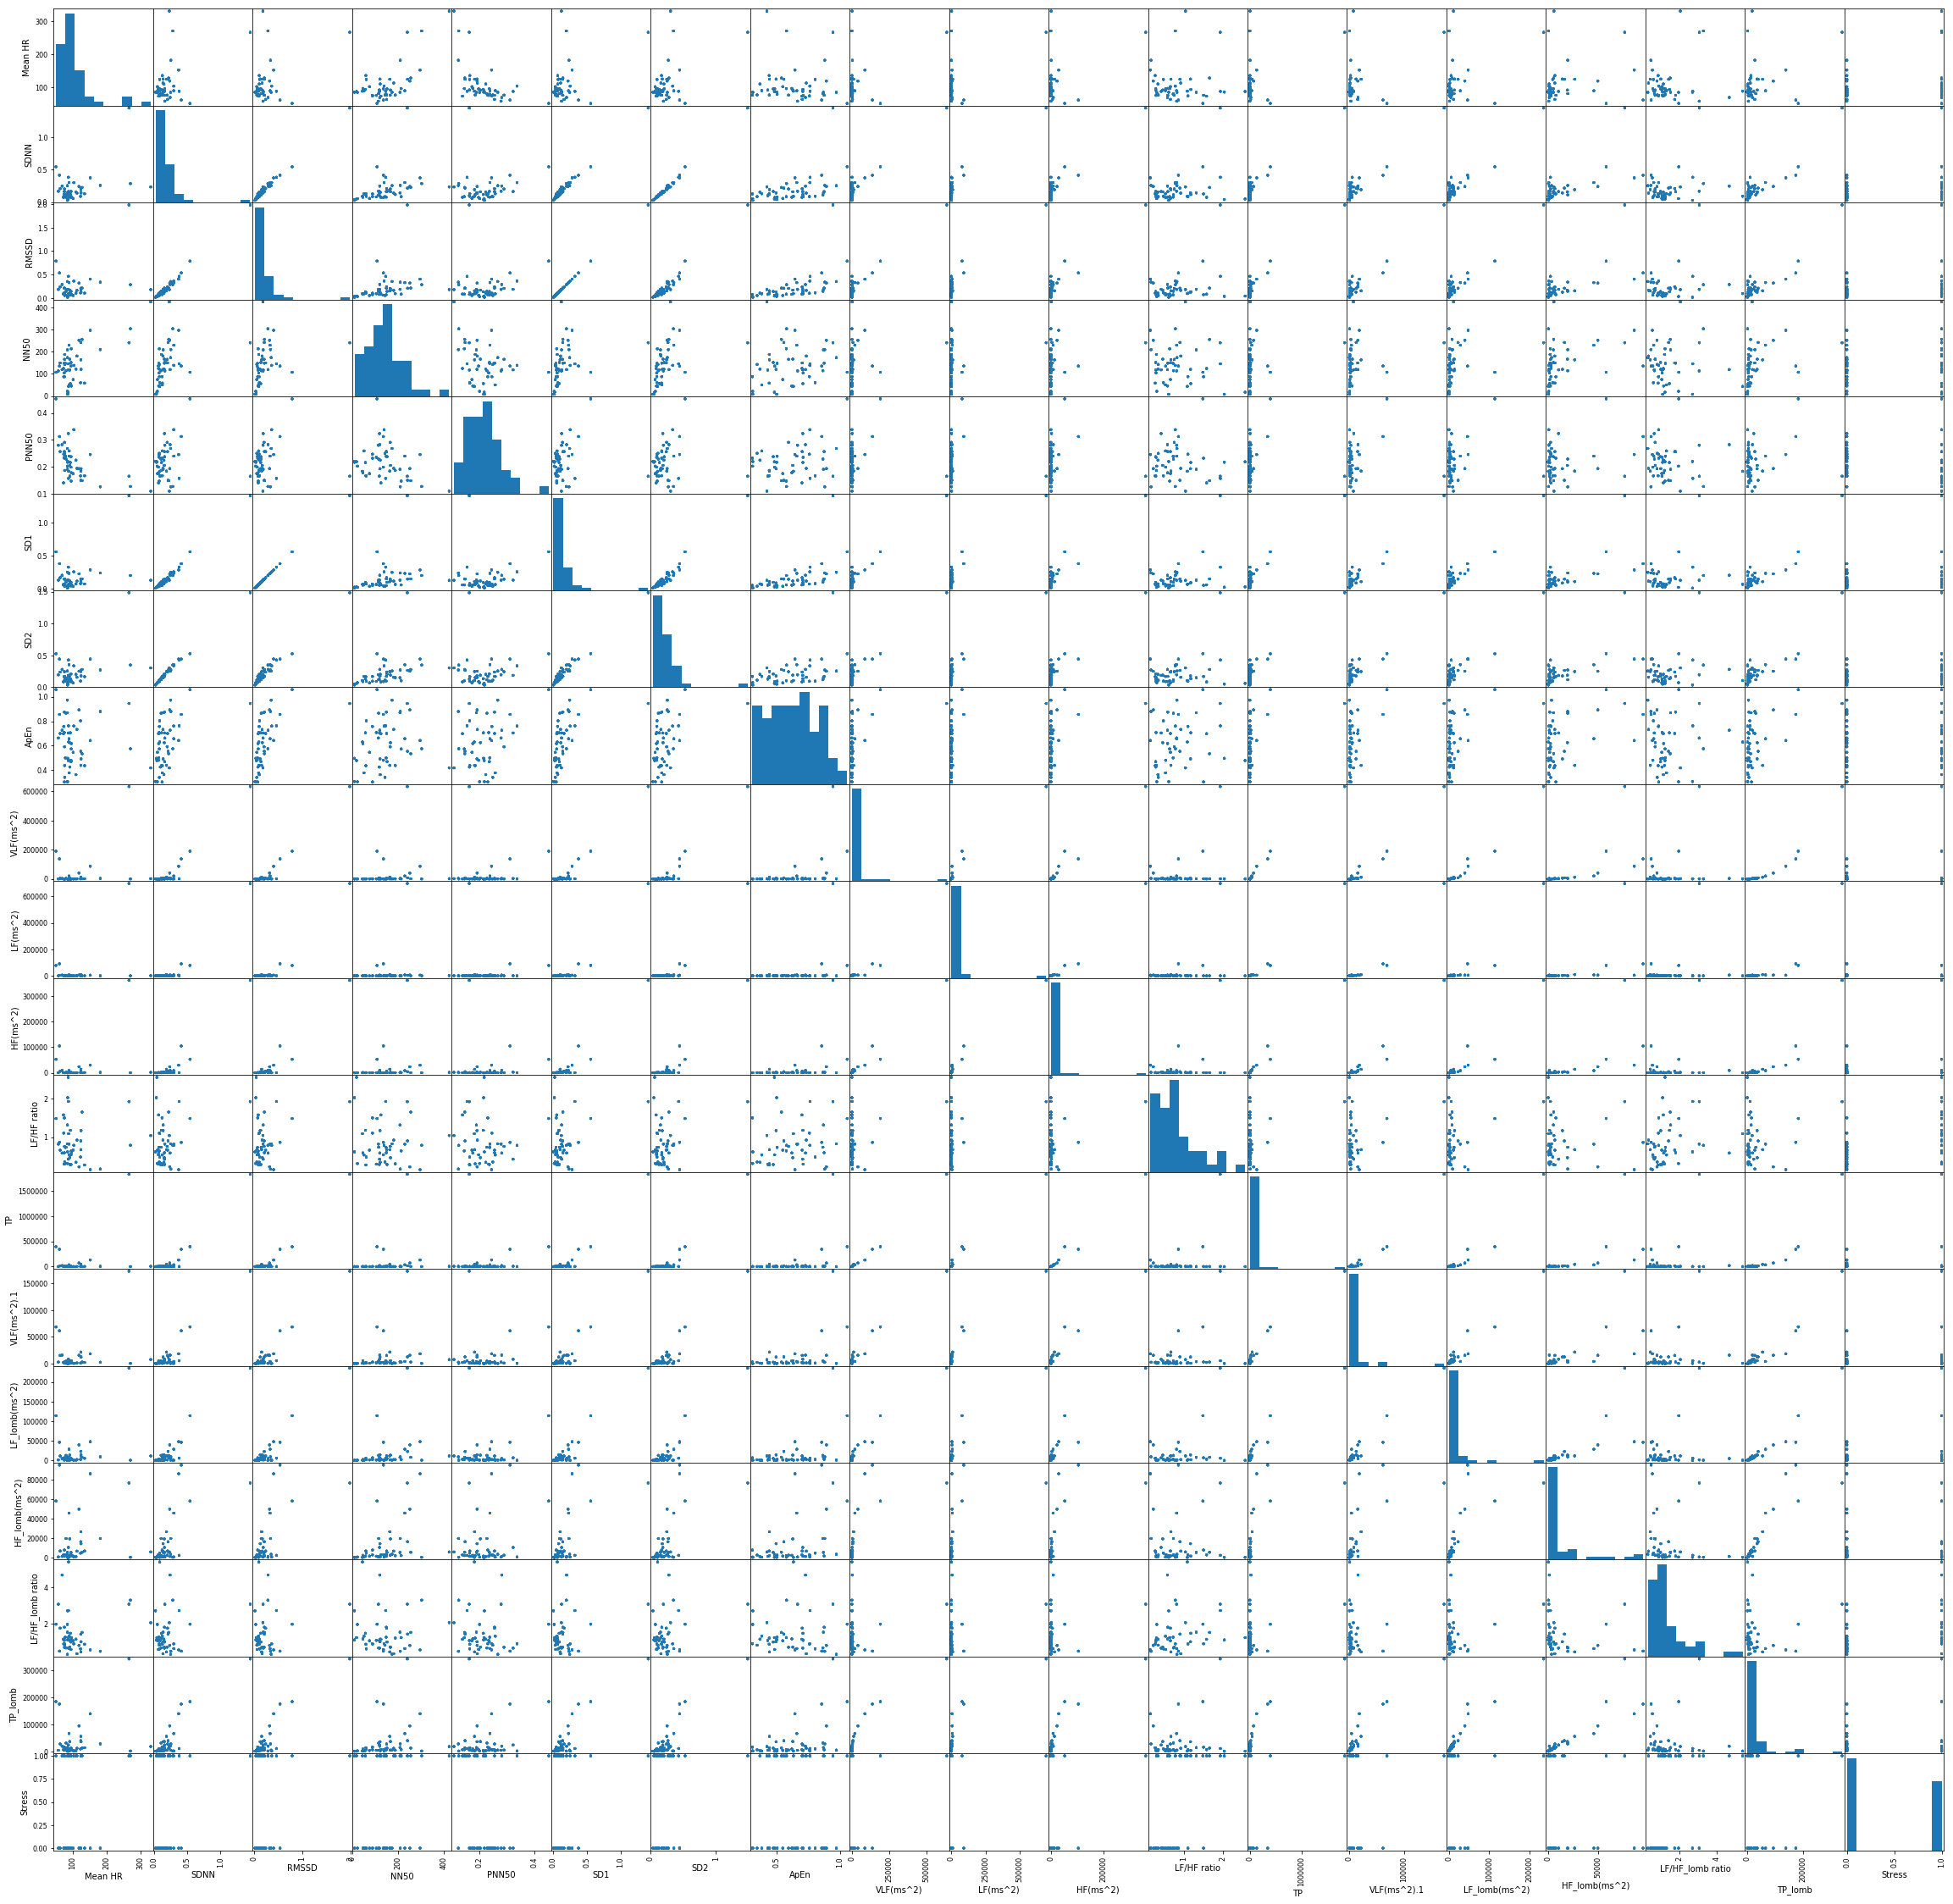

In [189]:
from pandas.plotting import scatter_matrix

scatter_matrix(df,figsize=(40,40))
pyplot.show()

In [190]:
# Evaluate using Leave One Out cross validation
from pandas import read_csv
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

num_folds = 10 # similar to train, test, split but using k-folds, folds of train and folds of test data.
loocv = LeaveOneOut()
models = DecisionTreeClassifier()
results = cross_val_score(models, rescaledX, rescaled_y, cv = loocv)
print("Accuracy: %.3f%% (%.3f%%)" %(results.mean()*100.0, results.std()*100.0) )


# # Evaluate using Leave One Out Cross Validation
# from pandas import read_csv
# from sklearn.model_selection import LeaveOneOut
# from sklearn.model_selection import cross_val_score
# from sklearn.linear_model import LogisticRegression
# filename = 'pima-indians-diabetes.data.csv'
# names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
# dataframe = read_csv(filename, names=names)
# array = dataframe.values
# X = array[:,0:8]
# Y = array[:,8]
# num_folds = 10
# loocv = LeaveOneOut()
# model = LogisticRegression()
# results = cross_val_score(model, X, Y, cv=loocv)
# print("Accuracy: %.3f%% (%.3f%%)") % (results.mean()*100.0, results.std()*100.0)

Accuracy: 100.000% (0.000%)


In [191]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression()
scoring = 'roc_auc'
results = cross_val_score(model,rescaledX, rescaled_y, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)"% (results.mean(), results.std()))

AUC: 0.934 (0.010)


/Users/syem/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/syem/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/syem/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/syem/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/syem/anaconda3/lib/pyth

In [192]:
# Cross Validation Classification Accuracy
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

kfold = KFold(n_splits=10, random_state = 7)
models = DecisionTreeClassifier()
scoring = 'accuracy'
results = cross_val_score(models, rescaledX, rescaled_y, cv=kfold, scoring = scoring)
print('Accuracy: %.3f (%.3f)' % (results.mean(), results.std()))

# # Cross Validation Classification Accuracy
# from pandas import read_csv
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score
# from sklearn.linear_model import LogisticRegression
# filename = 'pima-indians-diabetes.data.csv'
# names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
# dataframe = read_csv(filename, names=names)
# array = dataframe.values
# X = array[:,0:8]
# Y = array[:,8]
# kfold = KFold(n_splits=10, random_state=7)
# model = LogisticRegression()
# scoring = 'accuracy'
# results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
# print("Accuracy: %.3f (%.3f)") % (results.mean(), results.std())

Accuracy: 1.000 (0.000)


In [193]:
# cross validation classification logloss, confidence for prediction
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

kfold = KFold(n_splits = 10, random_state = 7)
models = DecisionTreeClassifier()
scoring = 'neg_log_loss'
results = cross_val_score(models,rescaledX, rescaled_y, cv=kfold, scoring = scoring)
print('Logloss: %.3f (%.3f)' % (results.mean(),results.std()))

# # Cross Validation Classification LogLoss
# from pandas import read_csv
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score
# from sklearn.linear_model import LogisticRegression
# filename = 'pima-indians-diabetes.data.csv'
# names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
# dataframe = read_csv(filename, names=names)
# array = dataframe.values
# X = array[:,0:8]
# Y = array[:,8]
# kfold = KFold(n_splits=10, random_state=7)
# model = LogisticRegression()
# scoring = 'neg_log_loss'
# results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

#print("Logloss: %.3f (%.3f)") % (results.mean(), results.std())

Logloss: -0.000 (0.000)


In [194]:
#cross validation classification roc auc
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

kfold = KFold(n_splits = 10, random_state = 7)
models = DecisionTreeClassifier()
scoring = 'roc_auc'
results = cross_val_score(models, rescaledX, rescaled_y, cv = kfold, scoring = scoring)
print('AUC: %.3f (%.3f)' % (results.mean(), results.std()))


# # Cross Validation Classification ROC AUC
# from pandas import read_csv
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score
# from sklearn.linear_model import LogisticRegression
# filename = 'pima-indians-diabetes.data.csv'
# names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
# dataframe = read_csv(filename, names=names)
# array = dataframe.values
# X = array[:,0:8]
# Y = array[:,8]
# kfold = KFold(n_splits=10, random_state=7)
# model = LogisticRegression()
# scoring = 'roc_auc'
# results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
# print("AUC: %.3f (%.3f)") % (results.mean(), results.std())

AUC: 1.000 (0.000)


In [322]:
# Cross Validation Classification Confusion Matrix
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix


models = DecisionTreeClassifier()
models.fit(X_train,y_train)

y_pred = models.predict(X_test) 
matrix1 = confusion_matrix(y_test, y_pred)
print(matrix1)


# # Cross Validation Classification Confusion Matrix
# from pandas import read_csv
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import confusion_matrix
# filename = 'pima-indians-diabetes.data.csv'
# names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
# dataframe = read_csv(filename, names=names)
# array = dataframe.values
# X = array[:,0:8]
# Y = array[:,8]
# test_size = 0.33
# seed = 7
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
# random_state=seed)
# model = LogisticRegression()
# model.fit(X_train, Y_train)
# predicted = model.predict(X_test)
# matrix = confusion_matrix(Y_test, predicted)
# print(matrix)


[[80  0]
 [ 0 77]]


In [323]:
TP = matrix1[1,1]
TN = matrix1[0,0]
FP = matrix1[0,1]
FN = matrix1[1,0]
TP, TN, FP, FN

(77, 80, 0, 0)

In [324]:
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred))


1.0
1.0


In [325]:
from sklearn.utils.multiclass import unique_labels

Confusion matrix, without normalization
[[80  0]
 [ 0 77]]
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


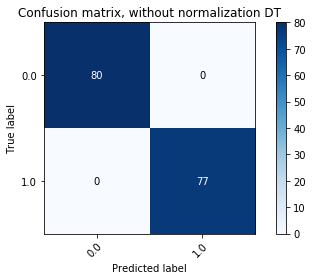

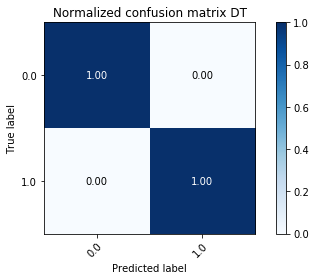

In [326]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = list(unique_labels(y_true, y_pred))
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=names,
                      title='Confusion matrix, without normalization DT')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=names, normalize=True,
                      title='Normalized confusion matrix DT')

plt.show()



In [119]:
#Cross Validation Classification Report
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

models = DecisionTreeClassifier()
models.fit(X_train, y_train)
y_pred = models.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)



# # Cross Validation Classification Report
# from pandas import read_csv
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report
# filename = 'pima-indians-diabetes.data.csv'
# names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
# dataframe = read_csv(filename, names=names)
# array = dataframe.values
# X = array[:,0:8]
# Y = array[:,8]
# test_size = 0.33
# seed = 7
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
# random_state=seed)
# model = LogisticRegression()
# model.fit(X_train, Y_train)
# predicted = model.predict(X_test)
# report = classification_report(Y_test, predicted)
# print(report)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        80
         1.0       1.00      1.00      1.00        77

   micro avg       1.00      1.00      1.00       157
   macro avg       1.00      1.00      1.00       157
weighted avg       1.00      1.00      1.00       157



In [120]:
#Cross Validation Regression MAE


from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

kfold = KFold(n_splits = 10, random_state = 7)
models = DecisionTreeClassifier()
scoring = 'neg_mean_absolute_error'
results = cross_val_score(models,rescaledX, rescaled_y, cv=kfold, scoring=scoring)
print('MAE: %.3f (%.3f)' % (results.mean(),results.std()))


# # Cross Validation Regression MAE
# from pandas import read_csv
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score
# from sklearn.linear_model import LinearRegression
# filename = 'housing.csv'
# names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
# 'B', 'LSTAT', 'MEDV']
# dataframe = read_csv(filename, delim_whitespace=True, names=names)
# array = dataframe.values
# X = array[:,0:13]
# Y = array[:,13]
# kfold = KFold(n_splits=10, random_state=7)
# model = LinearRegression()
# scoring = 'neg_mean_absolute_error'
# results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
# print("MAE: %.3f (%.3f)") % (results.mean(), results.std())

MAE: 0.000 (0.000)


In [121]:
#Cross Validation Regression R^2

from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

kfold = KFold(n_splits=10, random_state= 7)
models = DecisionTreeClassifier()
score = 'r2'
results = cross_val_score(models,rescaledX, rescaled_y, cv=kfold, scoring = score)
print('R^2: %.3f (%.3f)' % (results.mean(),results.std()))

# # Cross Validation Regression R^2
# from pandas import read_csv
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score
# from sklearn.linear_model import LinearRegression
# filename = 'housing.csv'
# names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
# 'B', 'LSTAT', 'MEDV']
# dataframe = read_csv(filename, delim_whitespace=True, names=names)
# array = dataframe.values
# X = array[:,0:13]
# Y = array[:,13]
# kfold = KFold(n_splits=10, random_state=7)
# model = LinearRegression()
# scoring = 'r2'
# results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
# print("R^2: %.3f (%.3f)") % (results.mean(), results.std())

R^2: 1.000 (0.000)


In [327]:
# Logistic Regression Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

kfold = KFold(n_splits =10, random_state = 7)
model2 = LogisticRegression()
model2.fit(X_train, y_train)
score = model2.score(X_test, y_test)

print(score)
results = cross_val_score(model2, rescaledX, rescaled_y, cv=kfold)
print(results.mean())

# # Logistic Regression Classification
# from pandas import read_csv
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score
# from sklearn.linear_model import LogisticRegression
# filename = 'pima-indians-diabetes.data.csv'
# names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
# dataframe = read_csv(filename, names=names)
# array = dataframe.values
# X = array[:,0:8]
# Y = array[:,8]
# num_folds = 10
# kfold = KFold(n_splits=10, random_state=7)
# model = LogisticRegression()
# results = cross_val_score(model, X, Y, cv=kfold)
# print(results.mean())

0.7770700636942676
0.8571405387861084


/Users/syem/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/syem/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/syem/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/syem/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/syem/anaconda3/lib/pyth

In [328]:
#LDA classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

num_folds = 10
kfold = KFold(n_splits=10, random_state=7)
model3 = LinearDiscriminantAnalysis()
results = cross_val_score(model3, rescaledX, rescaled_y, cv=kfold)
print(results)
model3.fit(X_train, y_train)
score = model3.score(X_test,y_test)
print(score)






# # LDA Classification
# from pandas import read_csv
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# filename = 'pima-indians-diabetes.data.csv'
# names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
# dataframe = read_csv(filename, names=names)
# array = dataframe.values
# X = array[:,0:8]
# Y = array[:,8]
# num_folds = 10
# kfold = KFold(n_splits=10, random_state=7)
# model = LinearDiscriminantAnalysis()
# results = cross_val_score(model, X, Y, cv=kfold)
# print(results.mean())

/Users/syem/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/syem/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/syem/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/syem/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/syem/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-v

[0.86 0.82 0.86 0.84 0.82 0.86 0.82 0.86 0.83 0.82]
0.8407643312101911


/Users/syem/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/syem/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/syem/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/syem/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/syem/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are c

In [329]:
model3.fit(X_train,y_train)
y_pred = model3.predict(X_test)
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[75  5]
 [20 57]]


/Users/syem/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/syem/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [330]:
report = classification_report(y_test, y_pred) # f1 measures accuracy
print(report)

              precision    recall  f1-score   support

         0.0       0.79      0.94      0.86        80
         1.0       0.92      0.74      0.82        77

   micro avg       0.84      0.84      0.84       157
   macro avg       0.85      0.84      0.84       157
weighted avg       0.85      0.84      0.84       157



In [331]:
accuracy_score(y_test, y_pred)

0.8407643312101911

Confusion matrix, without normalization
[[75  5]
 [20 57]]
Normalized confusion matrix
[[0.94 0.06]
 [0.26 0.74]]


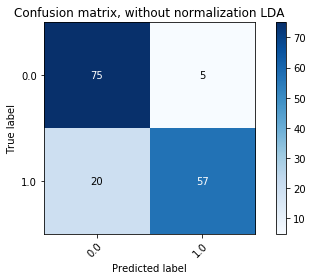

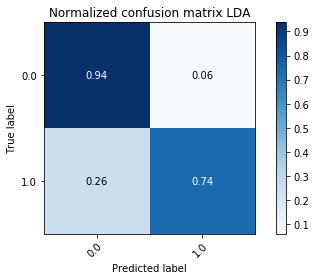

In [333]:
# reduce data, do some more results

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = list(unique_labels(y_true, y_pred))
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=names,
                      title='Confusion matrix, without normalization LDA')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=names, normalize=True,
                      title='Normalized confusion matrix LDA')

plt.show()

In [274]:
probs = model3.predict_proba(X_test)

In [275]:
false_positive_rate, recall, thresholds = roc_curve(y_test, probs[:,1])

In [276]:
roc_auc = auc(false_positive_rate, recall)

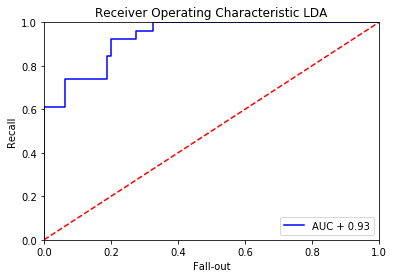

In [277]:
plt.title('Receiver Operating Characteristic LDA')
plt.plot(false_positive_rate, recall, 'b', label='AUC + %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel("Recall")
plt.xlabel('Fall-out')
plt.show()


In [271]:
y_pred_probs = model3.predict_proba(X_test)[:,1]

In [272]:
# precision recall curve
from sklearn.metrics import precision_recall_curve

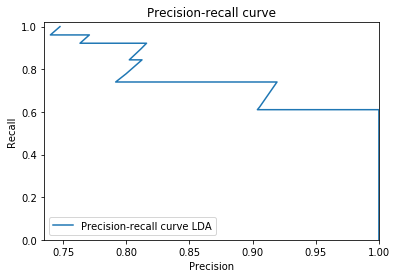

In [273]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_probs)
plt.plot(precision, recall, label = 'Precision-recall curve LDA') # label = title of the graph
_= plt.xlabel('Precision')
_= plt.ylabel('Recall')
_= plt.title('Precision-recall curve')
_= plt.xlim([0.735, 1])
_= plt.ylim([0, 1.02])
_= plt.legend(loc='lower left')


In [124]:
#KNN classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
kfold = KFold(n_splits=10, random_state=7)
model4 = KNeighborsClassifier()
results = cross_val_score(model4, rescaledX, rescaled_y, cv=kfold)
print(results)
model4.fit(X_train, y_train)
score = model4.score(X_test, y_test)
print(score)

# # KNN Classification
# from pandas import read_csv
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score
# from sklearn.neighbors import KNeighborsClassifier
# filename = 'pima-indians-diabetes.data.csv'
# names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
# dataframe = read_csv(filename, names=names)
# array = dataframe.values
# X = array[:,0:8]
# Y = array[:,8]
# num_folds = 10
# kfold = KFold(n_splits=10, random_state=7)
# model = KNeighborsClassifier()
# results = cross_val_score(model, X, Y, cv=kfold)
# print(results.mean())

/Users/syem/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1.0


/Users/syem/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/syem/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/syem/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/syem/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversi

In [334]:
#Gaussian Naive Bayes Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

kfold = KFold(n_splits=10, random_state=7)
model5 = GaussianNB()
results = cross_val_score(model5, rescaledX, rescaled_y, cv=kfold)
print(results)
model5.fit(X_train,y_train)
score = model5.score(X_test,y_test)
print(score)




# # Gaussian Naive Bayes Classification
# from pandas import read_csv
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score
# from sklearn.naive_bayes import GaussianNB
# filename = 'pima-indians-diabetes.data.csv'
# names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
# dataframe = read_csv(filename, names=names)
# array = dataframe.values
# X = array[:,0:8]
# Y = array[:,8]
# kfold = KFold(n_splits=10, random_state=7)
# model = GaussianNB()
# results = cross_val_score(model, X, Y, cv=kfold)
# print(results.mean())

[0.67 0.68 0.66 0.68 0.67 0.68 0.68 0.65 0.69 0.67]
0.6369426751592356


/Users/syem/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/syem/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/syem/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/syem/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

In [335]:
model5.fit(X_train, y_train)
y_pred = model5.predict(X_test)
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[73  7]
 [50 27]]


/Users/syem/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [336]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.59      0.91      0.72        80
         1.0       0.79      0.35      0.49        77

   micro avg       0.64      0.64      0.64       157
   macro avg       0.69      0.63      0.60       157
weighted avg       0.69      0.64      0.61       157



In [337]:
accuracy_score(y_test, y_pred)

0.6369426751592356

Confusion matrix, without normalization
[[73  7]
 [50 27]]
Normalized confusion matrix
[[0.91 0.09]
 [0.65 0.35]]


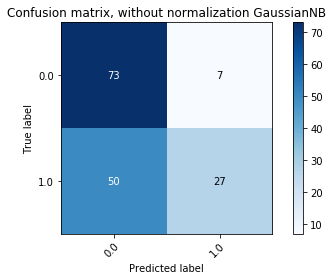

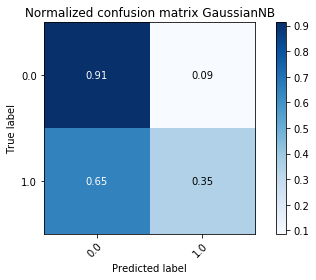

In [338]:
# reduce data, do some more results

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = list(unique_labels(y_true, y_pred))
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=names,
                      title='Confusion matrix, without normalization GaussianNB')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=names, normalize=True,
                      title='Normalized confusion matrix GaussianNB')

plt.show()

In [265]:
probs = model5.predict_proba(X_test)

In [266]:
false_positive_rate, recall, thresholds = roc_curve(y_test, probs[:,1])

In [267]:
roc_auc = auc(false_positive_rate, recall)

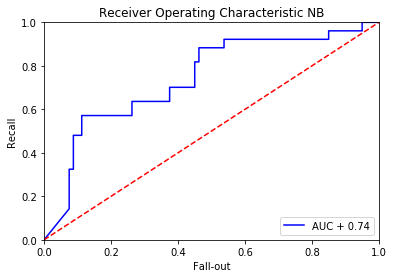

In [269]:
plt.title('Receiver Operating Characteristic NB')
plt.plot(false_positive_rate, recall, 'b', label="AUC + %0.2f" % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()


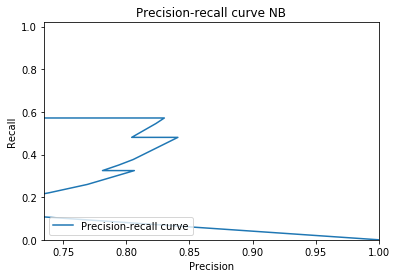

In [262]:
y_pred_probs = model5.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_probs)
# create plot
plt.plot(precision, recall, label = 'Precision-recall curve')
_= plt.xlabel('Precision')
_= plt.ylabel('Recall')
_= plt.title('Precision-recall curve NB')
_= plt.xlim([0.735, 1])
_= plt.ylim([0, 1.02])
_= plt.legend(loc='lower left')


In [339]:
#SVM classification

from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
kfold = KFold(n_splits=10, random_state=7)
model6 = SVC(random_state = 0, probability=True)

results = cross_val_score(model6, rescaledX, rescaled_y, cv=kfold)
print(results)
model6.fit(X_train,y_train)
score = model6.score(X_test, y_test)
print(score)

# # SVM Classification
# from pandas import read_csv
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score
# from sklearn.svm import SVC
# filename = 'pima-indians-diabetes.data.csv'
# names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
# dataframe = read_csv(filename, names=names)
# array = dataframe.values
# X = array[:,0:8]
# Y = array[:,8]
# kfold = KFold(n_splits=10, random_state=7)
# model = SVC()
# results = cross_val_score(model, X, Y, cv=kfold)
# print(results.mean())

/Users/syem/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/syem/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/syem/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/syem/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' t

[0.85 0.8  0.81 0.84 0.79 0.85 0.79 0.81 0.83 0.79]
0.7643312101910829


/Users/syem/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/syem/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/syem/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/syem/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' t

In [340]:
model6.fit(X_train, y_train)
y_pred = model6.predict(X_test)
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[75  5]
 [32 45]]


/Users/syem/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/syem/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [341]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.70      0.94      0.80        80
         1.0       0.90      0.58      0.71        77

   micro avg       0.76      0.76      0.76       157
   macro avg       0.80      0.76      0.76       157
weighted avg       0.80      0.76      0.76       157



In [342]:
accuracy_score(y_test, y_pred) # SVM

0.7643312101910829

Confusion matrix, without normalization
[[75  5]
 [32 45]]
Normalized confusion matrix
[[0.94 0.06]
 [0.42 0.58]]


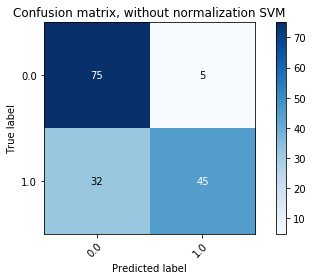

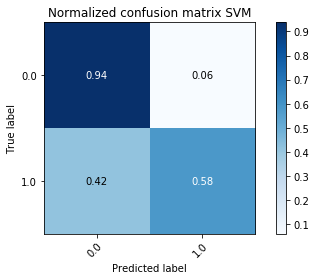

In [343]:
# reduce data, do some more results

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = list(unique_labels(y_true, y_pred))
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=names,
                      title='Confusion matrix, without normalization SVM')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=names, normalize=True,
                      title='Normalized confusion matrix SVM')

plt.show()

In [287]:
probs = model6.predict_proba(X_test)

In [288]:
false_positive_rate, recall, thresholds = roc_curve(y_test, probs[:,1])

In [289]:
roc_auc = auc(false_positive_rate, recall)

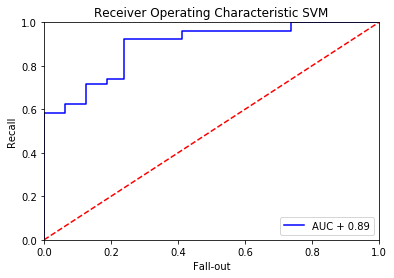

In [290]:
plt.title('Receiver Operating Characteristic SVM')
plt.plot(false_positive_rate, recall, 'b', label="AUC + %0.2f" % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()


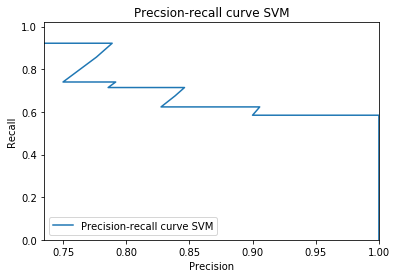

In [291]:
y_pred_probs = model6.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_probs)
plt.plot(precision, recall, label='Precision-recall curve SVM')
_= plt.xlabel('Precision')
_= plt.ylabel('Recall')
_= plt.title('Precsion-recall curve SVM')
_= plt.xlim([0.735, 1])
_= plt.ylim([0, 1.02])
_= plt.legend(loc= 'lower left')


In [344]:
from sklearn.metrics import confusion_matrix

clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[70 10]
 [25 52]]


/Users/syem/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/syem/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [345]:
from sklearn.metrics import classification_report
clf = LogisticRegression()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
report = classification_report(y_test, predicted)
print(report)

              precision    recall  f1-score   support

         0.0       0.74      0.88      0.80        80
         1.0       0.84      0.68      0.75        77

   micro avg       0.78      0.78      0.78       157
   macro avg       0.79      0.78      0.77       157
weighted avg       0.79      0.78      0.77       157



/Users/syem/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/syem/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [346]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7770700636942676

Confusion matrix, without normalization
[[70 10]
 [25 52]]
Normalized confusion matrix
[[0.88 0.12]
 [0.32 0.68]]


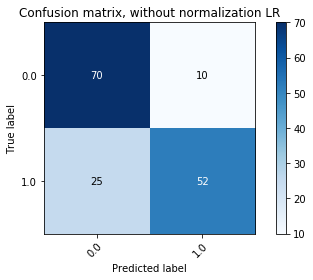

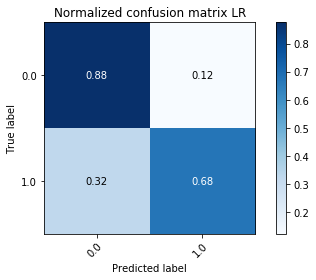

In [347]:
# reduce data, do some more results

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = list(unique_labels(y_true, y_pred))
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=names,
                      title='Confusion matrix, without normalization LR')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=names, normalize=True,
                      title='Normalized confusion matrix LR')

plt.show()



In [296]:
probs = clf.predict_proba(X_test)

In [297]:
false_positive_rate, recall, thresholds = roc_curve(y_test, probs[:,1])

In [298]:
roc_auc = auc(false_positive_rate, recall)

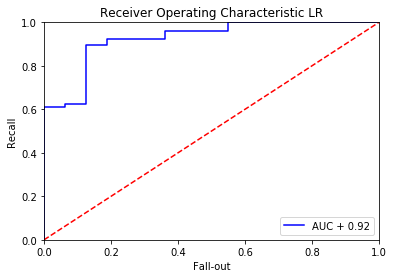

In [299]:
plt.title('Receiver Operating Characteristic LR')
plt.plot(false_positive_rate, recall, 'b', label="AUC + %0.2f" % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()


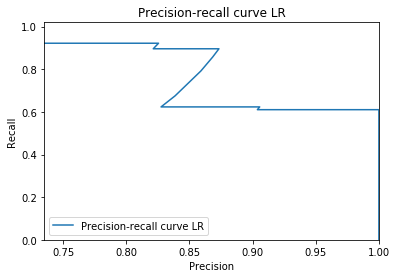

In [300]:
y_pred_probs = clf.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_probs)
plt.plot(precision, recall, label = 'Precision-recall curve LR')
_= plt.xlabel('Precision')
_= plt.ylabel('Recall')
_= plt.title('Precision-recall curve LR')
_= plt.xlim([0.735, 1])
_= plt.ylim([0, 1.02])
_= plt.legend(loc = 'lower left')


/Users/syem/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/syem/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/syem/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/syem/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/syem/anaconda3/lib/pyth

 LR: 0.857141 (0.005084)
 DT: 0.857141 (0.005084)
 KNN: 0.857141 (0.005084)
 LDA: 0.857141 (0.005084)


/Users/syem/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/syem/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/syem/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/syem/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/syem/anaconda3/lib/pyth

 NB: 0.857141 (0.005084)
 SVM: 0.857141 (0.005084)


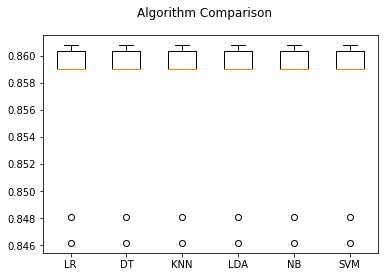

In [132]:
# Compare Algorithms 
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

models = []
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
results = []
model_names = []
scoring = 'accuracy'

for name, models in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, rescaledX, rescaled_y, cv=kfold, scoring = scoring)
    results.append(cv_results)
    model_names.append(name)
    msg = (" %s: %f (%f)" % (name, cv_results.mean(), cv_results.std()))
    print(msg)
    # box plot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(model_names)
pyplot.show()





# # Compare Algorithms
# from pandas import read_csv
# from matplotlib import pyplot
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import SVC
# # load dataset
# filename = 'pima-indians-diabetes.data.csv'
# names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
# dataframe = read_csv(filename, names=names)
# array = dataframe.values
# X = array[:,0:8]
# Y = array[:,8]
# # prepare models
# models = []
# models.append(('LR', LogisticRegression()))
# models.append(('LDA', LinearDiscriminantAnalysis()))
# models.append(('KNN', KNeighborsClassifier()))
# models.append(('CART', DecisionTreeClassifier()))
# models.append(('NB', GaussianNB()))
# models.append(('SVM', SVC()))
# # evaluate each model in turn
# results = []
# names = []
# scoring = 'accuracy'
# for name, model in models:
# kfold = KFold(n_splits=10, random_state=7)
# cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
# results.append(cv_results)
# names.append(name)
# msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
# print(msg)
# # boxplot algorithm comparison
# fig = pyplot.figure()
# fig.suptitle('Algorithm Comparison')
# ax = fig.add_subplot(111)
# pyplot.boxplot(results)
# ax.set_xticklabels(names)
# pyplot.show()

In [301]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [302]:
model = DecisionTreeClassifier(random_state = 0)

In [303]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [304]:
# predict probability for test data
probs = model.predict_proba(X_test)


In [305]:
false_positive_rate, recall, thresholds = roc_curve(y_test, probs[:,1])

In [306]:
roc_auc = auc(false_positive_rate, recall)


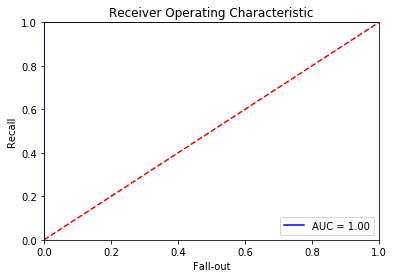

In [307]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, recall, 'b', label='AUC = %0.2f' % roc_auc)# recall =  How many tp/correct hits were found
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()


In [308]:
kfold = KFold(n_splits=10, random_state=7)

scoring = 'roc_auc'
results = cross_val_score(model,rescaledX, rescaled_y, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)"% (results.mean(), results.std()))
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=np.random.RandomState(0)))

AUC: 1.000 (0.000)


In [309]:
from sklearn.metrics import roc_curve, auc
y_score = classifier.fit(X_train, y_train).decision_function(X_test)


In [310]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

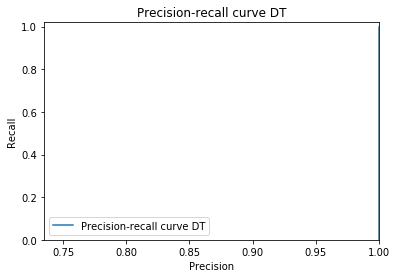

In [320]:
y_pred_probs = model.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_probs)
# create plot
plt.plot(precision, recall, label= 'Precision-recall curve DT')
_= plt.xlabel('Precision')
_= plt.ylabel('Recall')
_= plt.title('Precision-recall curve DT')
_= plt.xlim([0.735, 1])
_= plt.ylim([0, 1.02])
_= plt.legend(loc='lower left')


IndexError: too many indices for array

KeyError: 0

<Figure size 432x288 with 0 Axes>